# World Disaster Risk Analysis 

In [1]:
#!conda install geopandas -y


In [37]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
#plots.style.use('fivethirtyeight')

import math as mt
from scipy.stats import norm
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

## Import Data

In [3]:
wri = pd.read_csv('Data/world_risk_index.csv')
wri.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


### Background: 

The WorldRiskIndex is a statistical model that provides an assessment of the latent risk of 193 countries falling victim to a humanitarian disaster caused by extreme natural events and the negative impacts of climate change. Based on peer-reviewed concepts of risk, hazard and vulnerability, it is assumed that disaster risks are not solely shaped by the occurrence, intensity, and duration of extreme natural events, but that social factors, political conditions, and economic structures are equally responsible for whether disasters occur in the context of extreme natural events. Accordingly, both main spheres of disaster risk, exposure and vulnerability, are treated as equals.

The WorldRiskIndex was initially developed in 2011 by the United Nations University Institute for Environment and Human Security (UNU-EHS) for Bündnis Entwicklung Hilft as a model with 27 indicators to analytically link and relate the two spheres of disaster risks – exposure to natural hazards such as earthquakes, storms or droughts, and societal capacities to respond to these kinds of events. The methodology of the WorldRiskIndex has been continuously revised and developed by the Institute for International Law of Peace and Armed Conflict (IFHV) since 2018. In 2022, a new, fully revised model of the WorldRiskIndex was published, enabling more accurate analyses by incorporating more than 100 high-quality indicators, new data sources, and more robust statistical methods, thus finally replacing the previously used model.

source: https://data.humdata.org/dataset/worldriskindex

### Description of the data: 

* Region: Name of the region.
* WRI: World Risk Score of the region.
* Exposure: Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea level rise.
* Vulnerability: Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
* Susceptibility: Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
* Lack of Coping Capabilities: Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
* Lack of Adaptive Capacities: Adaptive capacities related to coming natural events, climate change, and other challenges.
* Year: Year data is being described.
* WRI Category: WRI Category for the given WRI Score.
* Exposure Category: Exposure Category for the given Exposure Score.
* Vulnerability Category: Vulnerability Category for the given Vulnerability Score.
* Susceptibility Category: Susceptibility Category for the given Susceptibility Score.

source:  https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset/data

### Observations:

The data collected spans from 2011 to 2021. Based on the description, the two primary spheres of disaster risk are exposure and vulnerability, which are treated as equally important.

* __Exposure__ is influenced by the occurrence, intensity, and duration of extreme natural events.
* __Vulnerability__ is shaped by social factors, political conditions, and economic structures.

It will be interesting for us to explore the WRI of countries, with a focus on its  relationship exposure and vulnerability. 


## Data Cleaning

In [4]:
wri.isnull().sum()

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

In [5]:
wri[wri.duplicated()]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category


In [6]:
wri.rename(columns={' Lack of Adaptive Capacities': 'Lack of Adaptive Capacities'}, inplace=True)
wri.rename(columns={'Region': 'Country'}, inplace=True)
wri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1917 non-null   object 
 1   WRI                          1917 non-null   float64
 2   Exposure                     1917 non-null   float64
 3   Vulnerability                1917 non-null   float64
 4   Susceptibility               1917 non-null   float64
 5   Lack of Coping Capabilities  1917 non-null   float64
 6   Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                         1917 non-null   int64  
 8   Exposure Category            1917 non-null   object 
 9   WRI Category                 1916 non-null   object 
 10  Vulnerability Category       1913 non-null   object 
 11  Susceptibility Category      1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [7]:
wri.isnull().sum()

Country                        0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    1
Year                           0
Exposure Category              0
WRI Category                   1
Vulnerability Category         4
Susceptibility Category        0
dtype: int64

To handle the missing "Category" values, we will fill in the missing values based on the data. For the quantitative data, we will replace missing values with the mean.

In [8]:
#show the location of the nulls
rows_with_nulls = wri[wri.isnull().any(axis=1)]
rows_with_nulls

,Country,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1193,Österreich,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low
1202,Deutschland,2.43,11.51,21.11,14.30,36.44,12.60,2019,Low,Very Low,NaN,Very Low
1205,Norwegen,2.34,10.60,22.06,13.29,39.21,13.68,2019,Low,Very Low,NaN,Very Low
1292,Föd. Staaten v. Mikronesien,7.59,14.95,50.77,31.79,72.13,48.39,2020,High,NaN,High,High
1858,Korea Republic of 4.59,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High


In [9]:
#Calculate Min and Max Values for Each Category
data_2019 = wri[wri['Year'] == 2019]
data_2020 = wri[wri['Year'] == 2020]

category_stats = data_2019.groupby('Vulnerability Category')['Vulnerability'].agg(['min', 'max']).reset_index() #to dataframe
category_stats = category_stats.sort_values(by='min')
category_stats

,Vulnerability Category,min,max
4,Very Low,22.49,33.01
1,Low,33.10,41.98
2,Medium,42.18,47.86
0,High,47.98,61.74
3,Very High,61.99,76.13


In [10]:
#Fill in the missing values
wri.loc[1193,'Vulnerability Category'] = 'Very Low'
wri.loc[1202,'Vulnerability Category'] = 'Very Low'
wri.loc[1205,'Vulnerability Category'] = 'Very Low'

In [11]:
#Calculate Min and Max Values for Each Category
data_2016 = wri[wri['Year'] == 2016]
category_stats = data_2016.groupby('Vulnerability Category')['Vulnerability'].agg(['min', 'max']).reset_index() 
category_stats = category_stats.sort_values(by='min')
category_stats

,Vulnerability Category,min,max
4,Very Low,24.79,34.40
1,Low,35.10,43.11
2,Medium,43.40,49.72
0,High,50.57,62.58
3,Very High,63.01,74.80


In [12]:
wri.loc[1858,'Vulnerability Category'] = 'Very Low'

In [13]:
#Calculate Min and Max Values for Each Category
data_2020 = wri[wri['Year'] == 2020]
category_stats = data_2020.groupby('WRI Category')['WRI'].agg(['min', 'max']).reset_index() 
category_stats = category_stats.sort_values(by='min')
category_stats

,WRI Category,min,max
4,Very Low,0.31,3.14
1,Low,3.30,5.66
2,Medium,5.68,7.57
0,High,7.71,10.51
3,Very High,10.76,49.74


In [14]:
#Fill in the missing value
wri.loc[1292,'WRI Category'] = 'Medium'

In [15]:
mean_lack_adaptive = data_2016['Lack of Adaptive Capacities'].mean()
wri.loc[1858,'Lack of Adaptive Capacities']=mean_lack_adaptive

In [16]:
wri.isnull().sum()

Country                        0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   0
Vulnerability Category         0
Susceptibility Category        0
dtype: int64

We have cleaned our dataset, making sure there are no null or duplicate values. 

__Note:__ Some of the missing category values fall outside the observed range, suggesting they may have been treated as outliers. Furthermore, filling in missing values for "Lack of Adaptive Capacities" with the mean could introduce bias. If we do not use models that rely on a complete dataset, it might be more appropriate to drop these rows with missing values to avoid potential distortion of analysis.

## Exploratory Data Analysis

In [17]:
wri.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090562,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.547619,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.200000,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.090000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.060000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [18]:
quantitative_features = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 
                         'Lack of Coping Capabilities', 'Lack of Adaptive Capacities']

# Calculate the correlation matrix
correlation_matrix = wri[quantitative_features].corr()

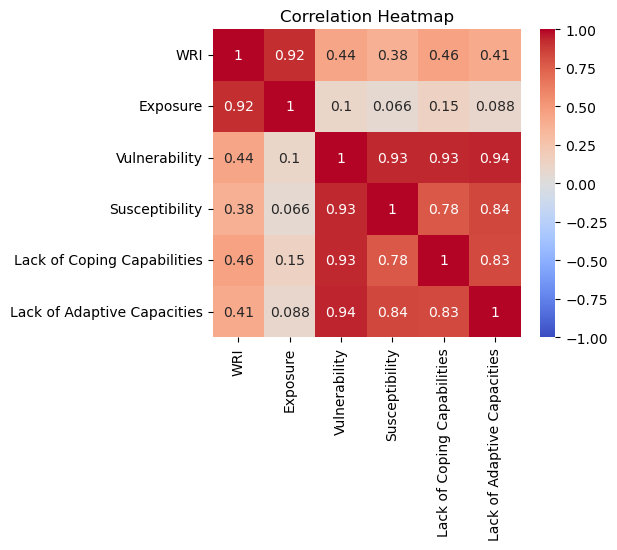

In [19]:
# Create the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap')
plt.show()

The correlation  heatmap provides a visual representation of the strength and direction of the relationships between the six quantitative features: WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, and Lack of Adaptive Capacities.

### Key Observations

 
__WRI and Exposure 0.92:__ There is a very strong positive correlation between WRI and Exposure. This suggests that exposure is a heavily weighted in determining determing the world risk index. 

__WRI and Vulnerability 0.44:__ There is a moderate positive correlation between WRI and Vulnerability. While Vulnerability is associated with WRI, its influence is less significant compared to Exposure.

__Vulnerability and Susceptibility, Lack of Adaptive Capacities, and Lack of Coping Capabilities: 0.93, 0.94, 0.93:__ There is a similarly strong positive correlation between Vulnerability and the factors of Susceptibility, Lack of Adaptive Capacities, and Lack of Coping Capabilities. "Societal vulnerability is divided into susceptibility to extreme natural events, lack of coping capacities, and lack of adaptive capacities." This suggests that Vulnerability is significantly influenced by these three sub-components.

__Susceptibility, Lack of Adaptive Capacities, and Lack of Coping Capabilities 0.78, 0.83, 0.84:__ The heat graph shows that the each of the three measures are strongly correlated to the others.  This suggests that regions struggling with one are likely to struggle with the other, compounding their overall vulnerability.

__Exposure and Vulnerability 0.10:__ The low positive correlation between Exposure and Vulnerability suggests that these two variables are relatively independent. Regions with high exposure do not necessarily have high vulnerability, and vice versa.


#### Summary: 
We have observed that the World Risk Index (WRI) is primarily related to Exposure, rather than Vulnerability. Additionally, Vulnerability is significantly influenced by its sub-components, such as Susceptibility, Lack of Coping Capacities, and Lack of Adaptive Capacities. The strong correlations among these sub-components suggest that some regions face compounded challenges, which could heighten their vulnerability and make recovery and improvements more difficult.

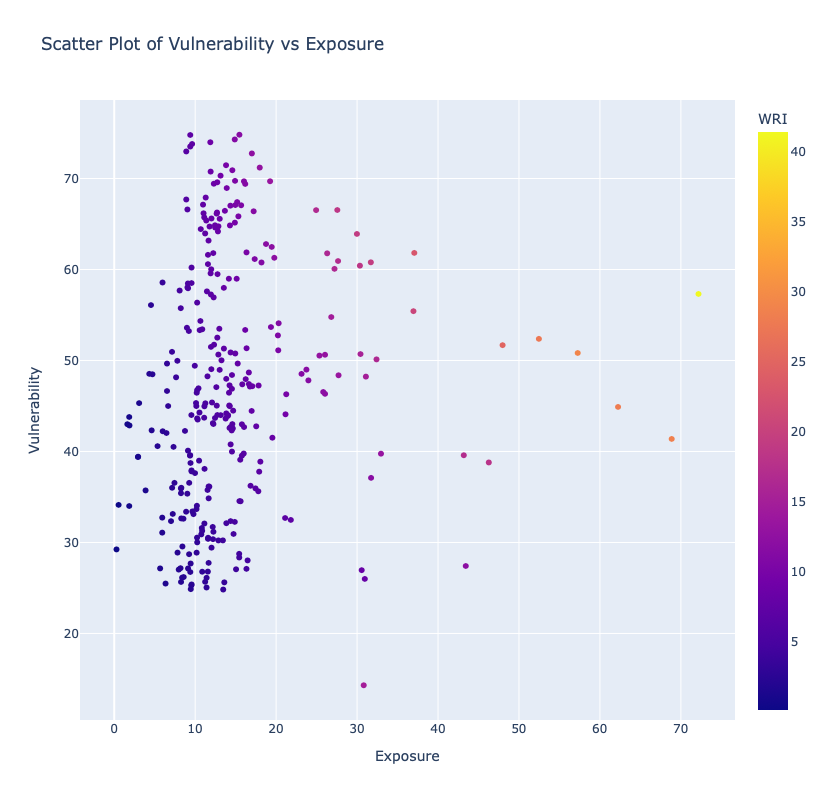

In [41]:
mean_wri = wri.groupby('Country').mean().reset_index()

fig = px.scatter(mean_wri, 
                 x='Exposure',  
                 y='Vulnerability',       
                 color='WRI', 
                #text='Region',  
                 title='Scatter Plot of Vulnerability vs Exposure',
                 labels={'Vulnerability': 'Vulnerability', 'Exposure': 'Exposure', 'Country':'Country'})

fig.update_layout(
    width=1000, 
    height=800, 
    xaxis_title='Exposure',
    yaxis_title='Vulnerability'      
)

fig.show()


In [21]:
year_group = wri.groupby('Year').mean()

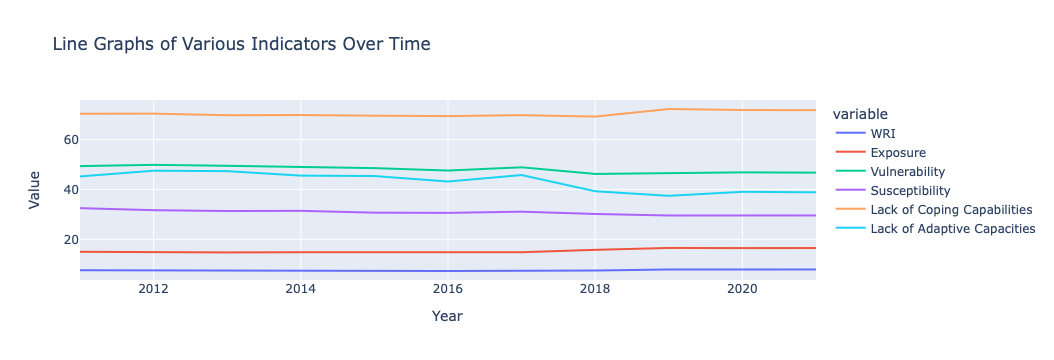

In [ ]:
year_group_reset = year_group.reset_index()

fig = px.line(year_group_reset, x='Year', y=year_group.columns, labels={'value': 'Value'}, title='Line Graphs of Various Indicators Over Time')

fig.show()

Overall, Vulnerability and its subcategories of Lack of Adaptive Capacities and Susceptibility have been on a downward trend from 2011 to 2021, indicating potential improvements in these areas over time. Meanwhile, Lack of Coping Capabilities, Exposure, and WRI show slight increases.

In [ ]:
data_2021 = wri[wri['Year'] == 2021]
wri_2021 = data_2021[['Country','WRI']]
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gdf.rename(columns={'name': 'Country'})
gapminder = px.data.gapminder()

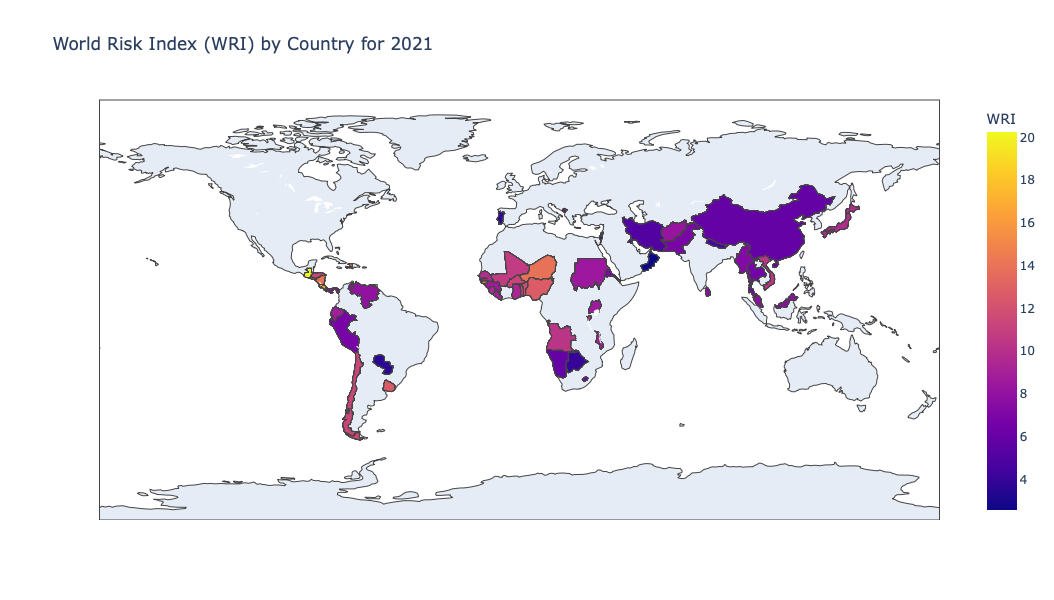

In [ ]:
#gdf_2021 = pd.merge(gdf, wri_2021, how='left', left_on='Country', right_on='Country')
df = pd.merge(gapminder, wri_2021, how='left', left_on='country', right_on='Country')

fig = px.choropleth(df, locations="iso_alpha",
                    color="WRI", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='World Risk Index (WRI) by Country for 2021',
                    width=1000,  
                    height=600)

np.random.seed(12)
fig.show()


In [ ]:
us_data = wri[wri['Country'] == 'United States']
us_data

,Country,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
643,United States,3.88,12.25,31.67,16.47,48.57,29.98,2014,Medium,Low,Very Low,Very Low
1872,United States,3.76,12.25,30.68,16.35,48.24,27.46,2016,Medium,Low,Very Low,Very Low


This map shows that some countries in Africa, South America and Central America have the highest disaster risk in 2021. The table below confirms that the blank areas on the map correspond to missing data. In the next map, we will use the mean WRI values over 2011 to 2021 for each country to provide a more comprehensive view of disaster risk across countries.

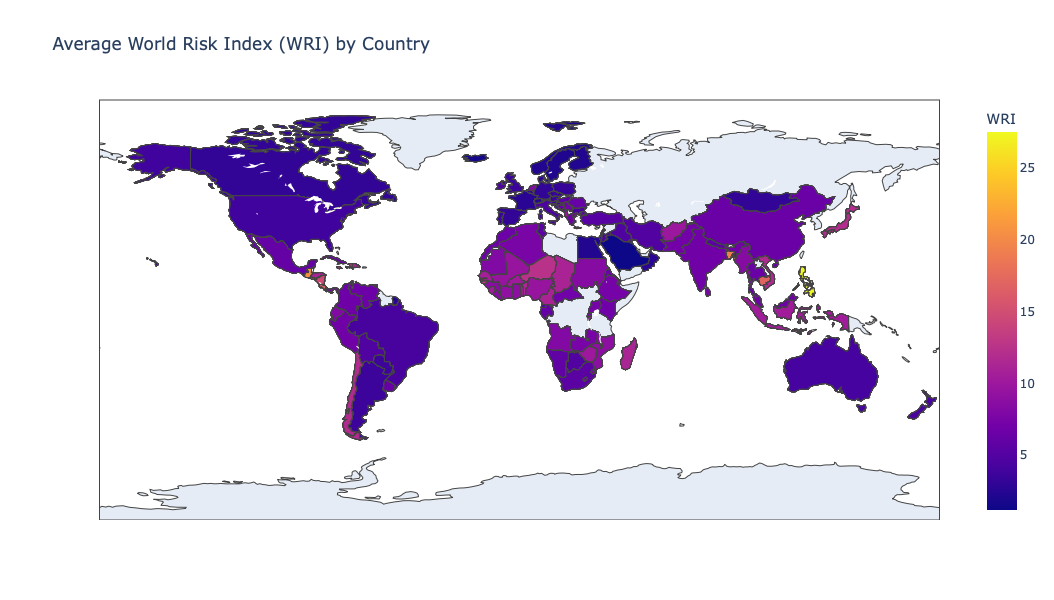

In [ ]:
mean_wri = wri.groupby('Country').mean().reset_index()
df = pd.merge(gapminder, mean_wri, how='left', left_on='country', right_on='Country')

fig = px.choropleth(df, locations="iso_alpha",
                    color="WRI", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average World Risk Index (WRI) by Country',
                    width=1000,  
                    height=600)

np.random.seed(12)
fig.show()

This choropleth map highlights that certain countries in West Africa, Southeast Asia, and Central America have the highest World Risk Index (WRI). Notably, the Philippines stands out with the highest WRI on the map at 27.47. In the earlier map, the Philippines was not included in the data, causing other countries to appear with disproportionately high WRIs compared to their 10-year averages. However, by hovering over the countries on this map, we can observe that most have not experienced significant increases in WRI.

Now, let’s take a closer look at some of the countries with the highest WRI individually.

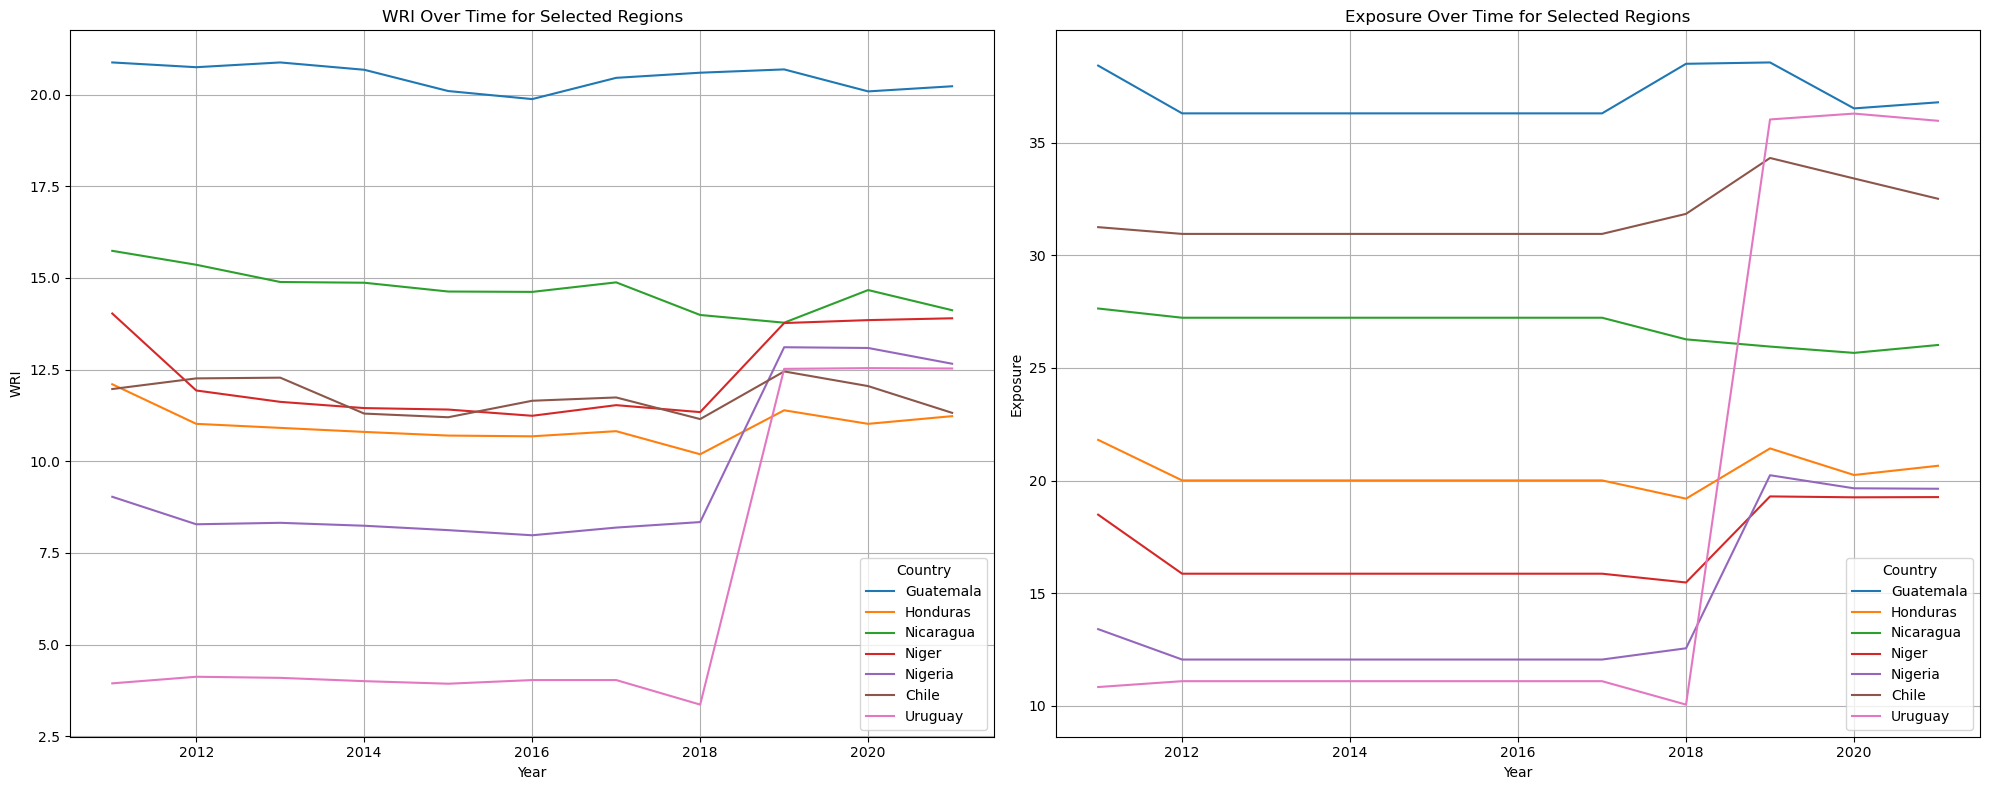

In [ ]:
regions_of_interest = ['Guatemala', 'Honduras', 'Nicaragua', 'Niger', 'Nigeria', 'Chile', 'Uruguay']

wri_filtered = wri[wri['Country'].isin(regions_of_interest)]

wri_pivoted_wri = wri_filtered.pivot(index='Year', columns='Country', values='WRI')
wri_pivoted_exposure = wri_filtered.pivot(index='Year', columns='Country', values='Exposure')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# WRI
for region in regions_of_interest:
    axes[0].plot(wri_pivoted_wri.index, wri_pivoted_wri[region], label=region)

axes[0].set_title('WRI Over Time for Selected Regions')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('WRI')
axes[0].legend(title='Country')
axes[0].grid(True)

# Exposure
for region in regions_of_interest:
    axes[1].plot(wri_pivoted_exposure.index, wri_pivoted_exposure[region], label=region)

axes[1].set_title('Exposure Over Time for Selected Regions')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Exposure')
axes[1].legend(title='Country')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Since 2018, Niger, Nigeria, and Uruguay have seen both an increase in their World Risk Index (WRI) and Exposure.

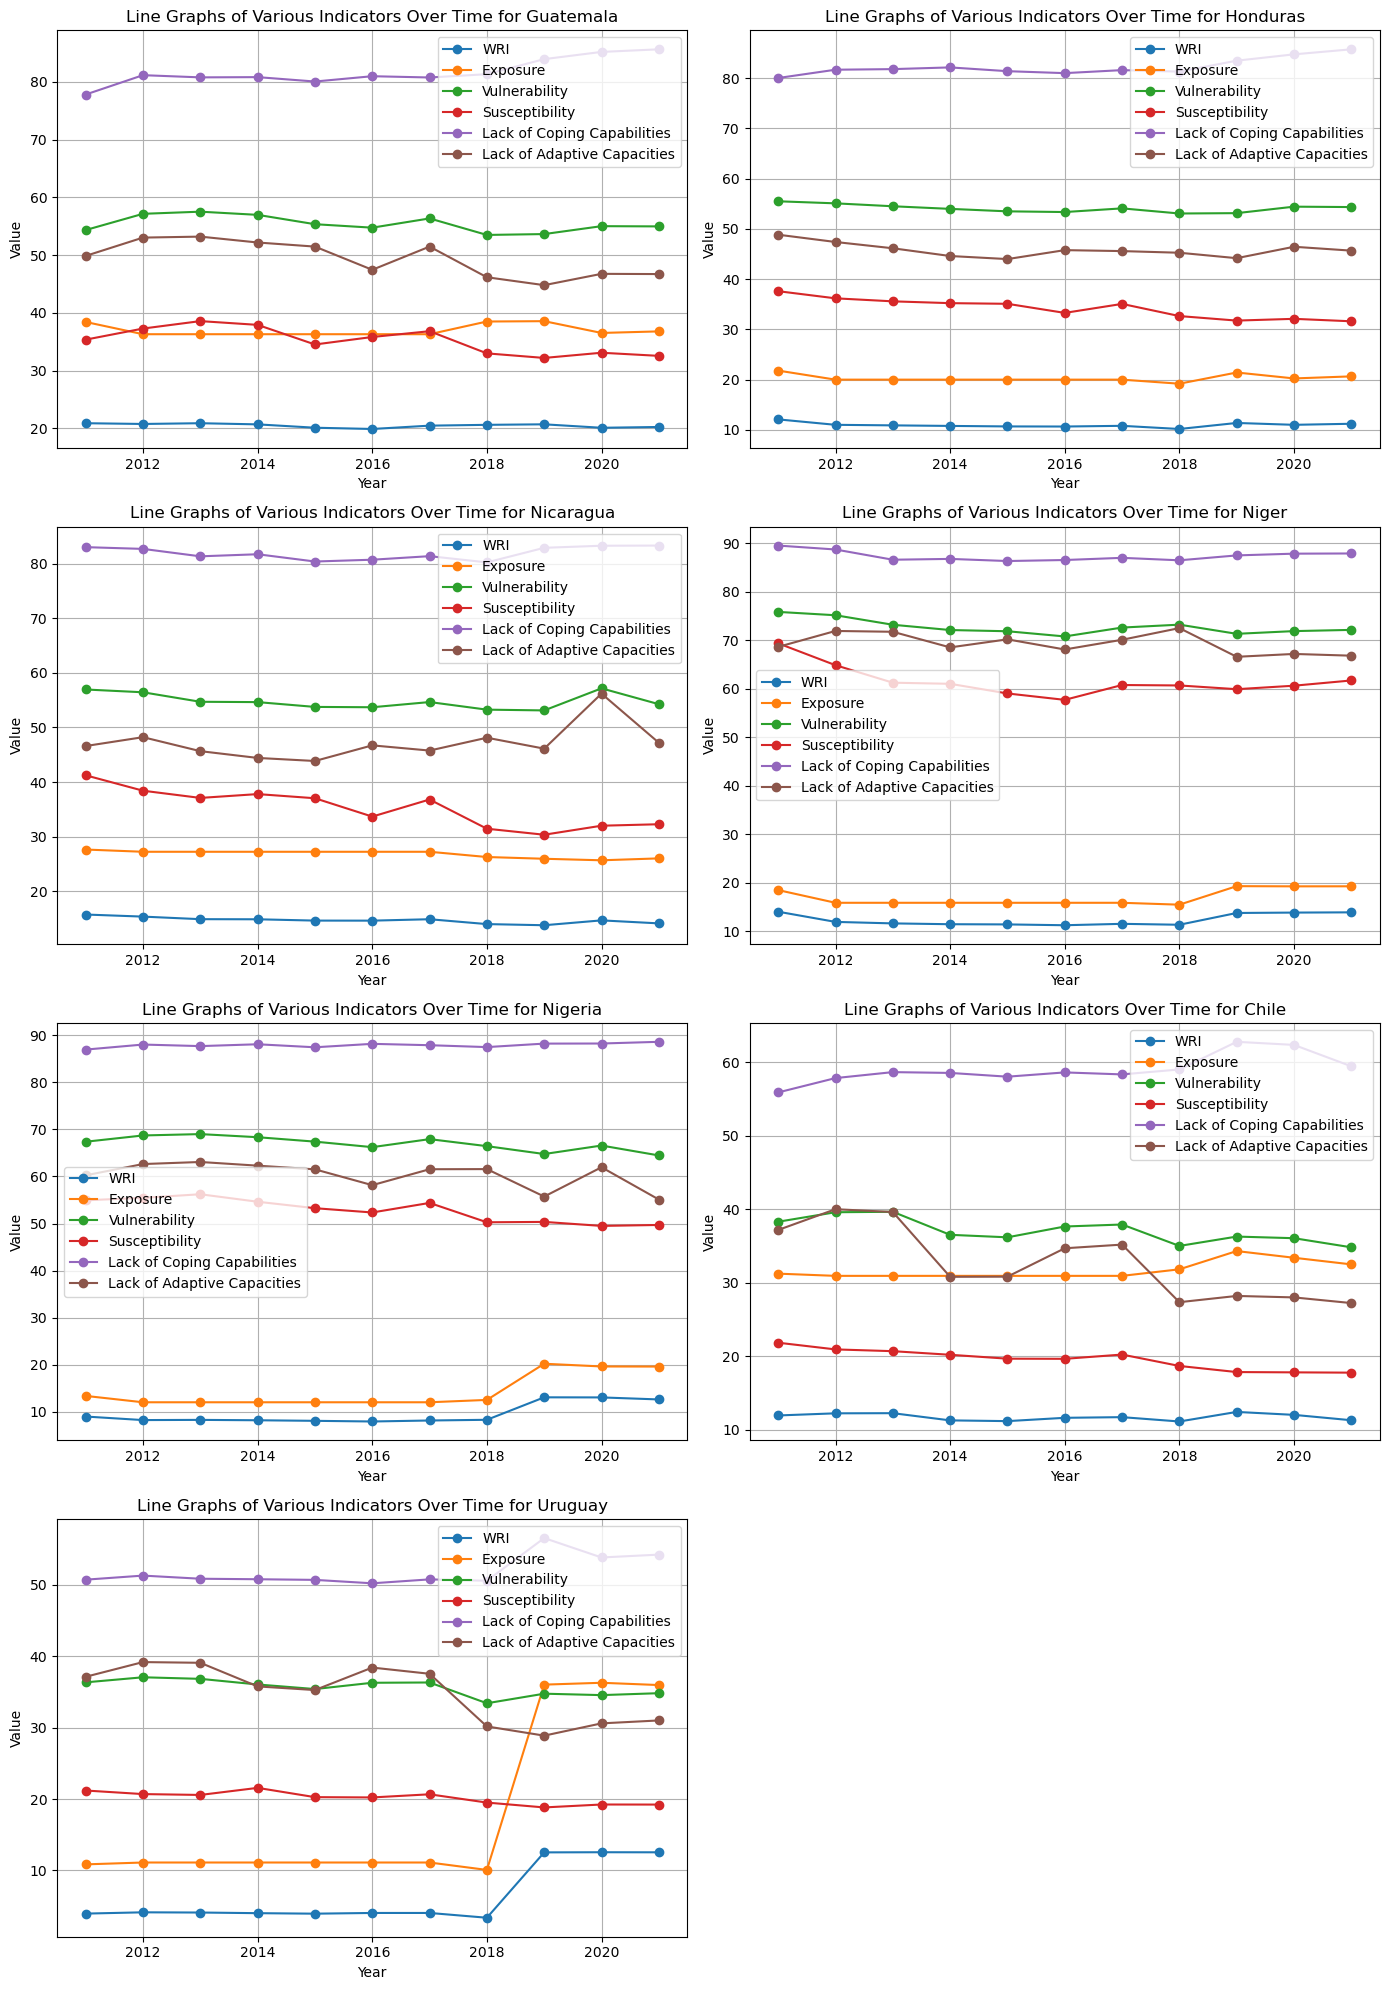

In [ ]:
regions_of_interest = ['Guatemala', 'Honduras', 'Nicaragua', 'Niger', 'Nigeria', 'Chile', 'Uruguay']

num_regions = len(regions_of_interest)
rows = (num_regions + 1) // 2  
fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))

axes = axes.flatten()

for i, region in enumerate(regions_of_interest):
    wri_region_yr = wri[wri['Country'] == region].groupby('Year').mean()
    
    for column in wri_region_yr.columns:
        axes[i].plot(wri_region_yr.index, wri_region_yr[column], marker='o', label=column)
    
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Line Graphs of Various Indicators Over Time for {region}')
    axes[i].legend(loc='best')
    axes[i].grid(True)

if num_regions % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Importing Country and HDI Data

In [ ]:
countries = pd.read_csv('Data/Countries.csv')
#countries.head()
df = pd.merge(countries, wri, how='left', on='Country')
df.head()

,Country,Code,Continent,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Afghanistan,AFG,Asia,Southern Asia,14.06,18.45,76.19,61.09,93.94,73.55,2011.0,Very High,Very High,Very High,Very High
1,Afghanistan,AFG,Asia,Southern Asia,9.93,13.17,75.41,56.67,93.44,76.11,2013.0,Medium,High,Very High,Very High
2,Afghanistan,AFG,Asia,Southern Asia,9.55,13.17,72.49,55.77,92.36,69.33,2015.0,Medium,High,Very High,Very High
3,Afghanistan,AFG,Asia,Southern Asia,9.71,13.17,73.73,55.93,93.37,71.89,2014.0,Medium,High,Very High,Very High
4,Afghanistan,AFG,Asia,Southern Asia,8.18,12.27,66.63,48.57,91.40,59.93,2021.0,Medium,High,Very High,Very High


In [ ]:
df['Region'].nunique()

23

In [ ]:
#gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf = gdf.rename(columns={'name': 'Country'})
#gdf = gdf.merge(wri, on='Country', how='left')
#gdf.head()

In [ ]:
HDI_2021 = pd.read_csv('Data/2021_development.csv')

In [ ]:
WRI_2021 = wri[wri['Year'] == 2021]
wri_hdi_2021 = pd.merge(WRI_2021, HDI_2021, how='left', on='Country')
wri_hdi_2021.head()

,Country,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,HDI rank,Human Development Index (HDI) - 2021,Life expectancy at birth - 2021,Expected years of schooling - 2021,Mean years of schooling - 2021,Gross national income (GNI) per capita - 2021
0,Vanuatu,47.73,82.55,57.82,39.66,81.21,52.59,2021,Very High,Very High,High,High,140.0,0.607,70.4,11.5,7.1,3085.0
1,Salomonen,31.16,51.13,60.95,46.07,81.14,55.63,2021,Very High,Very High,High,Very High,NaN,NaN,NaN,NaN,NaN,NaN
2,Tonga,30.51,63.63,47.95,28.42,79.81,35.62,2021,Very High,Very High,Medium,High,91.0,0.745,71.0,16.0,11.4,6822.0
3,Dominica,27.42,61.74,44.41,23.42,71.13,38.67,2021,Very High,Very High,Medium,Medium,102.0,0.720,72.8,13.3,8.1,11488.0
4,Antigua und Barbuda,27.28,67.73,40.28,23.80,64.41,32.62,2021,Very High,Very High,Low,Medium,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_counts = wri_hdi_2021.isnull().sum()
null_counts

Country                                            0
WRI                                                0
Exposure                                           0
Vulnerability                                      0
Susceptibility                                     0
Lack of Coping Capabilities                        0
Lack of Adaptive Capacities                        0
Year                                               0
Exposure Category                                  0
WRI Category                                       0
Vulnerability Category                             0
Susceptibility Category                            0
HDI rank                                         111
Human Development Index (HDI) - 2021             111
Life expectancy at birth - 2021                  111
Expected years of schooling - 2021               111
Mean years of schooling - 2021                   111
Gross national income (GNI) per capita - 2021    111
dtype: int64

In [ ]:
wri_hdi_2021_cleaned = wri_hdi_2021.dropna(subset=['HDI rank'])
wri_hdi_2021_cleaned

,Country,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,HDI rank,Human Development Index (HDI) - 2021,Life expectancy at birth - 2021,Expected years of schooling - 2021,Mean years of schooling - 2021,Gross national income (GNI) per capita - 2021
0,Vanuatu,47.73,82.55,57.82,39.66,81.21,52.59,2021,Very High,Very High,High,High,140.0,0.607,70.4,11.5,7.1,3085.0
2,Tonga,30.51,63.63,47.95,28.42,79.81,35.62,2021,Very High,Very High,Medium,High,91.0,0.745,71.0,16.0,11.4,6822.0
3,Dominica,27.42,61.74,44.41,23.42,71.13,38.67,2021,Very High,Very High,Medium,Medium,102.0,0.720,72.8,13.3,8.1,11488.0
5,Brunei Darussalam,22.77,58.17,39.14,15.33,68.13,33.96,2021,Very High,Very High,Low,Very Low,51.0,0.829,74.6,14.0,9.2,64490.0
6,Guyana,21.83,43.93,49.69,25.96,77.23,45.88,2021,Very High,Very High,High,Medium,108.0,0.714,65.7,12.5,8.6,22465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Belarus,2.64,8.00,32.96,16.68,56.36,25.84,2021,Very Low,Very Low,Very Low,Very Low,60.0,0.808,72.4,15.2,12.1,18849.0
163,Oman,2.54,6.04,42.02,23.68,66.65,35.73,2021,Very Low,Very Low,Low,Medium,54.0,0.816,72.5,14.6,11.7,27054.0
175,Barbados,1.37,3.61,37.96,20.66,60.11,33.12,2021,Very Low,Very Low,Low,Low,70.0,0.790,77.6,15.7,9.9,12306.0
176,Grenada,1.06,2.40,43.98,26.36,69.21,36.38,2021,Very Low,Very Low,Medium,Medium,68.0,0.795,74.9,18.7,9.0,13484.0


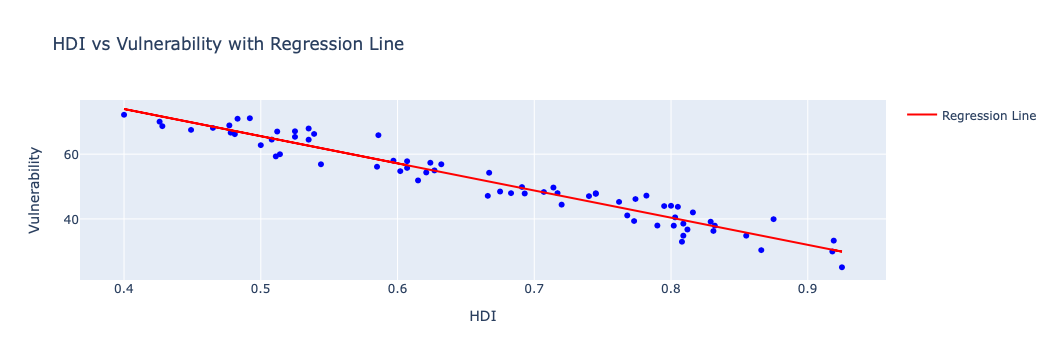

In [38]:
fig = px.scatter(wri_hdi_2021_cleaned, x='Human Development Index (HDI) - 2021', y='Vulnerability', 
                 title='HDI vs Vulnerability with Regression Line',
                 labels={'Human Development Index (HDI) - 2021': 'HDI', 'Vulnerability': 'Vulnerability'},
                 color_discrete_sequence=['blue'])

x = wri_hdi_2021_cleaned['Human Development Index (HDI) - 2021']
y = wri_hdi_2021_cleaned['Vulnerability']
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

fig.add_trace(go.Scatter(x=x, y=regression_line, mode='lines', name='Regression Line', line=dict(color='red')))

fig.update_layout(
    xaxis_title='HDI',
    yaxis_title='Vulnerability',
    showlegend=True
)

fig.show()


There is a strong negative correlation between HDI and WRI. Countries with higher levels of human development, such as better education, health, and living standards, generally experience lower levels of risk associated with natural disasters. 

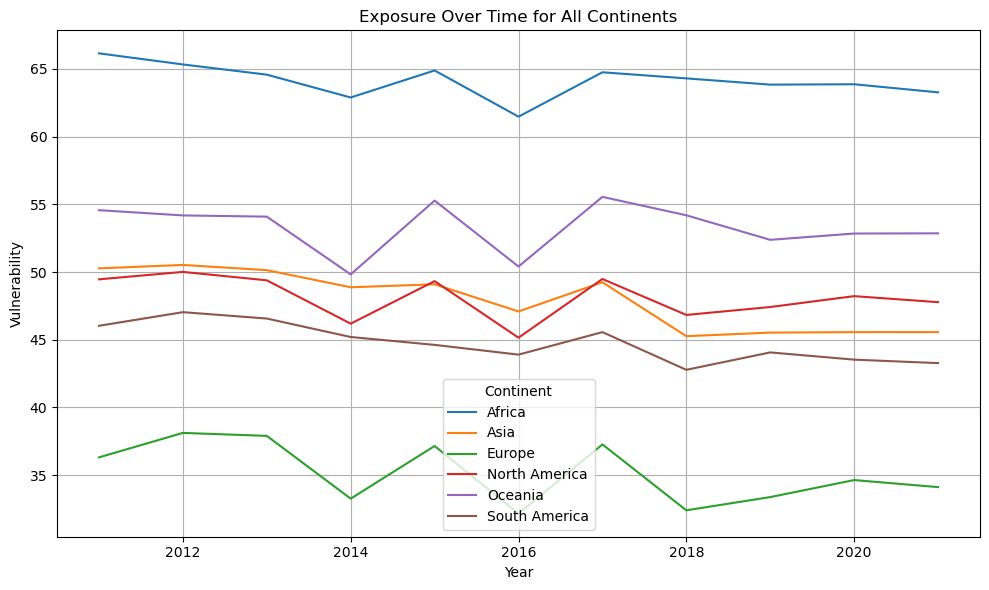

In [39]:
df_grouped = df.groupby(['Year', 'Continent']).mean().reset_index()

wri_pivoted_vulnerability = df_grouped.pivot(index='Year', columns='Continent', values='Vulnerability')

fig, ax = plt.subplots(figsize=(10, 6))

for region in wri_pivoted_vulnerability.columns:
    ax.plot(wri_pivoted_vulnerability.index, wri_pivoted_vulnerability[region], label=region)

ax.set_title('Exposure Over Time for All Continents')
ax.set_xlabel('Year')
ax.set_ylabel('Vulnerability')
ax.legend(title='Continent')
ax.grid(True)

plt.tight_layout()
plt.show()



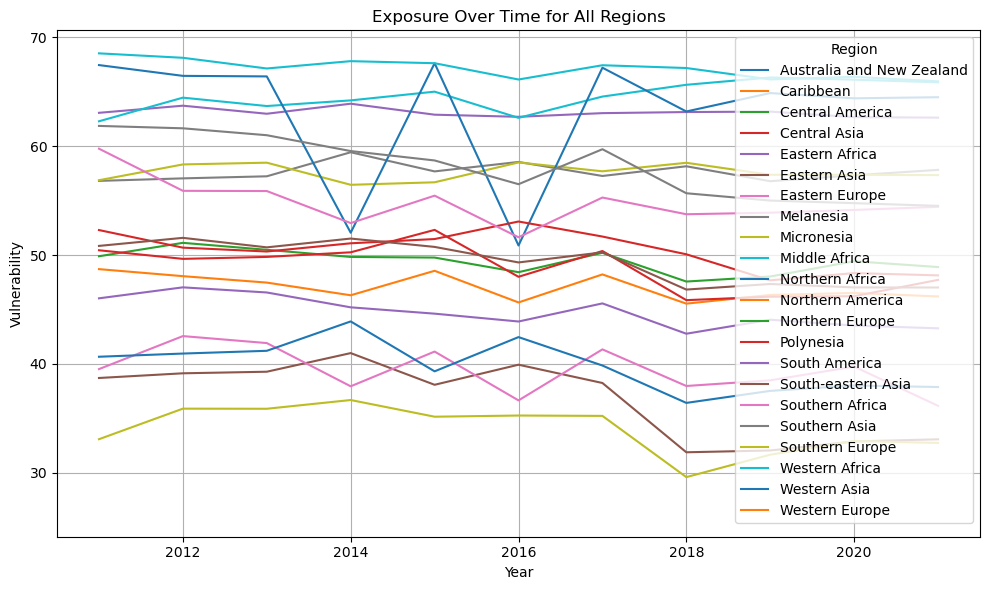

In [40]:
df_grouped = df.groupby(['Year', 'Region']).mean().reset_index()

wri_pivoted_vulnerability = df_grouped.pivot(index='Year', columns='Region', values='Vulnerability')

fig, ax = plt.subplots(figsize=(10, 6))

for region in wri_pivoted_vulnerability.columns:
    ax.plot(wri_pivoted_vulnerability.index, wri_pivoted_vulnerability[region], label=region)

ax.set_title('Exposure Over Time for All Regions')
ax.set_xlabel('Year')
ax.set_ylabel('Vulnerability')
ax.legend(title='Region')
ax.grid(True)

plt.tight_layout()
plt.show()
